In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
# Import the clean dataset into dataframe
df_master = pd.read_csv('df_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8300 entries, 0 to 8299
Data columns (total 16 columns):
Unnamed: 0            8300 non-null int64
tweet_id              8300 non-null int64
timestamp             8300 non-null object
source                8300 non-null object
text                  8300 non-null object
rating_numerator      8300 non-null int64
rating_denominator    8300 non-null int64
name                  5676 non-null object
jpg_url               8300 non-null object
favorite_count        8276 non-null float64
retweets              8276 non-null float64
user_followers        8276 non-null float64
friends_count         8276 non-null float64
dog_stage             8300 non-null object
dog_breed             7004 non-null object
confidence_level      8300 non-null float64
dtypes: float64(5), int64(4), object(7)
memory usage: 1.0+ MB


In [8]:
df_master.rename(columns ={'timestamp': 'tweet_date', 'source': 'tweet_source'}, inplace = True)

In [29]:
# confidence_level column dropped
#df_master.friends_count.value_counts()
# Drop friends counts also
#df_master.drop('friends_count', axis =1, inplace=True)
df_master.drop('Unnamed: 0', axis =1, inplace=True)

In [13]:
# changing the data types appropriately
# this needs to be done once the csv file is reloaded
df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['tweet_date'] = pd.to_datetime(df_master.tweet_date)
df_master['tweet_source'] = df_master['tweet_source'].astype('category')
df_master['dog_stage'] = df_master['dog_stage'].astype('category')

In [30]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8300 entries, 0 to 8299
Data columns (total 13 columns):
tweet_id              8300 non-null object
tweet_date            8300 non-null datetime64[ns]
tweet_source          8300 non-null category
text                  8300 non-null object
rating_numerator      8300 non-null int64
rating_denominator    8300 non-null int64
name                  5676 non-null object
jpg_url               8300 non-null object
favorite_count        8276 non-null float64
retweets              8276 non-null float64
user_followers        8276 non-null float64
dog_stage             8300 non-null category
dog_breed             7004 non-null object
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 729.9+ KB


In [31]:
# Check for correlation between column variables in the master dataframe to decide on plots
df_master.corr()

,rating_numerator,rating_denominator,favorite_count,retweets,user_followers
rating_numerator,1.000000,0.198240,0.016652,0.017829,-0.034698
rating_denominator,0.198240,1.000000,-0.025896,-0.022060,0.002971
favorite_count,0.016652,-0.025896,1.000000,0.840846,-0.518173
retweets,0.017829,-0.022060,0.840846,1.000000,-0.378661
user_followers,-0.034698,0.002971,-0.518173,-0.378661,1.000000


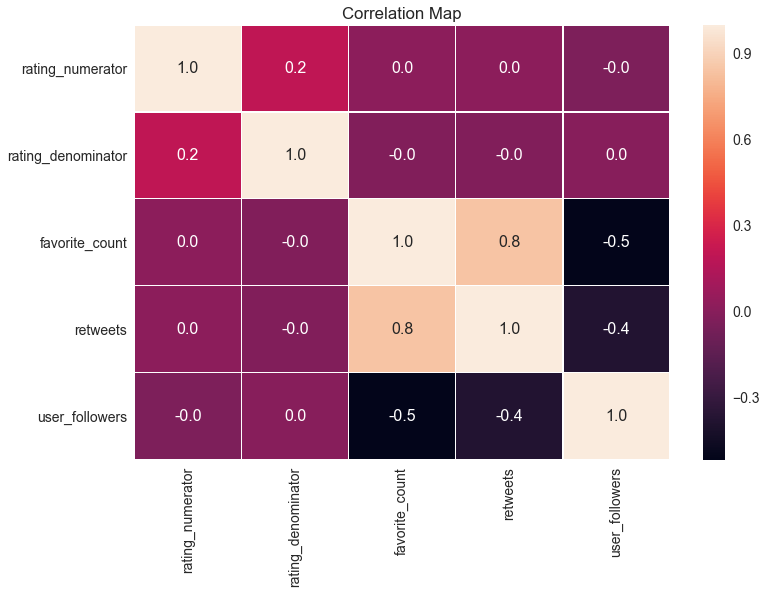

In [32]:
# Seaborn heat map for correlation
# https://stackoverflow.com/questions/33104322/auto-adjust-font-size-in-seaborn-heatmap
# For annot font size - annot_kws={"size":16}
# annot=True to see the values

sns.set(font_scale=1.4)
f,ax = plt.subplots(figsize=(12, 8))
#sns.heatmap(df_master.corr(), vmin = -1, vmax = 1, annot = True, annot_kws={ "size":16},linewidth =0.5, fmt = '.2f',ax=ax)
sns.heatmap(df_master.corr(), annot=True, annot_kws={"size":16}, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map');

#### From the correlation plot
- There is a strong relationship between retweets and favourite_count and this makes sense
- user followers and retweets have a negative correlation of -0.4
- similarly user_followers and favorites_count have a negative correlation of -0.5

#### Plot between the retweets and favourite_count

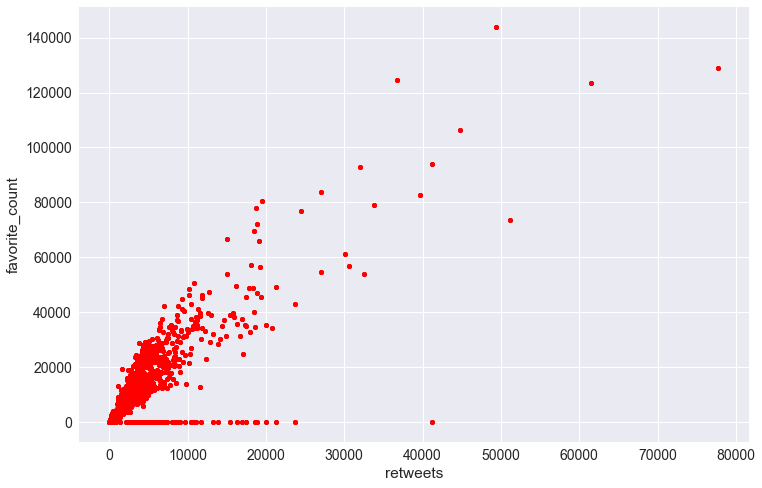

In [33]:
df_master.plot(kind ='scatter', x = 'retweets', y ='favorite_count', figsize =(12, 8), color = 'red');

#### We can see the strong correlation in the scatter_plot i.e when the retweets go high, so does the favorite_count

#### Dog stages

In [34]:
df_master[df_master.dog_stage != 'None']['dog_stage'].value_counts()

pupper     222
doggo       80
puppo       24
floofer      8
None         0
Name: dog_stage, dtype: int64

In [35]:
# Getting the count for the dog_stages
dog_stage_count_list = df_master[df_master.dog_stage != 'None']['dog_stage'].value_counts().tolist()
dog_stages_list = df_master[df_master.dog_stage != 'None']['dog_stage'].value_counts().index.tolist()

In [41]:
df_master.dog_stage = df_master[df_master.dog_stage != 'None']['dog_stage']

In [46]:
df_master[df_master.dog_stage != 'None']['dog_stage'].value_counts()

pupper     222
doggo       80
puppo       24
floofer      8
None         0
Name: dog_stage, dtype: int64

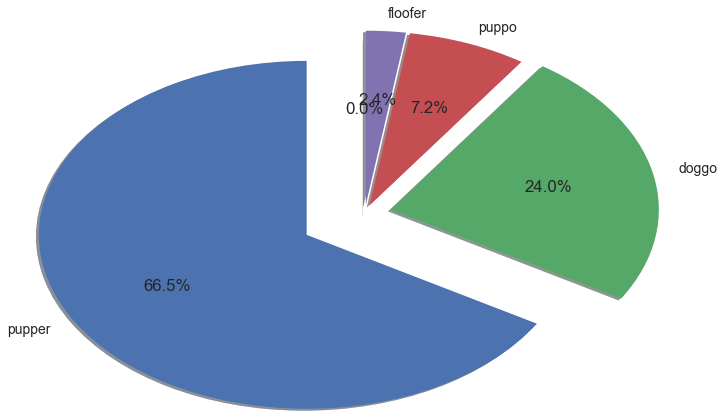

In [48]:
# Plot a pie chart for dog_stage values
# A simple pie chart
# Ref: https://matplotlib.org/gallery/pie_and_polar_charts/pie_demo2.html#sphx-glr-gallery-pie-and-polar-charts-pie-demo2-py
explode =(0.5, 0.2, 0.1, 0.1, 0)
df_master[df_master.dog_stage != 'None']['dog_stage'].value_counts().plot(kind = 'pie', explode = explode,
                                                                          autopct='%1.1f%%', startangle=90, shadow=True, 
                                                                          labels = dog_stages_list, radius = 2);

plt.savefig('dog-stages-pie.png')

C:\Users\dkaithav\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


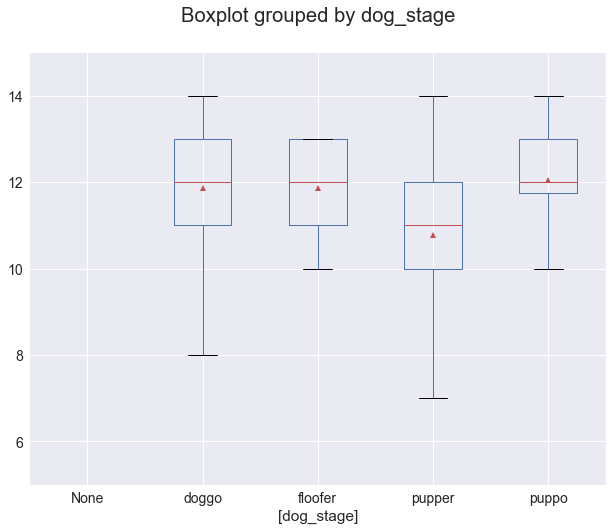

In [50]:
# Dog stages with ratings plot - a box plot

#df_master[df_master.dog_stage != 'None'].boxplot(column = 'rating_numerator', labels = 'dog_stage');
import seaborn
df_master[df_master['dog_stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_stage'],figsize = (10,8),
                                                   showmeans = True)
plt.ylim(5,15);
plt.title('');

dog_stage
None             NaN
doggo      11.862500
floofer    11.875000
pupper     10.779279
puppo      12.041667
Name: rating_numerator, dtype: float64

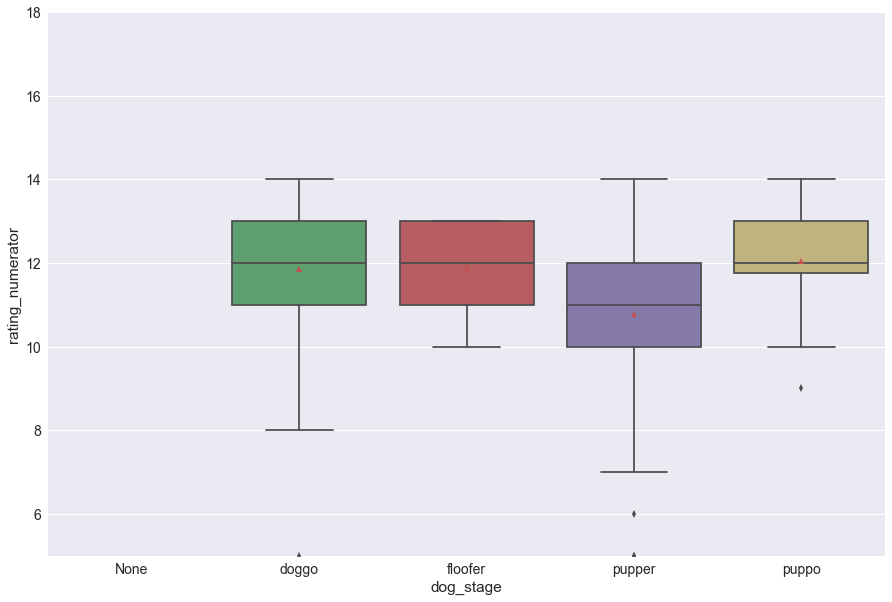

In [52]:
# Using seaborn
# Ref: https://stackoverflow.com/questions/33227473/how-to-set-the-range-of-y-axis-for-a-seaborn-boxplot
plt.rcParams['figure.figsize']=(15,10) # setting the dimensions for the plot
#sns.set_style("whitegrid")
sns.boxplot(x = 'dog_stage', y= 'rating_numerator',showmeans = True, data= df_master)
plt.ylim(5,18); # Applying range filter for y-axis
plt.savefig('ratings-dogstages.png')
# Mean ratings by dog_stages
df_master[df_master['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

## Breed count

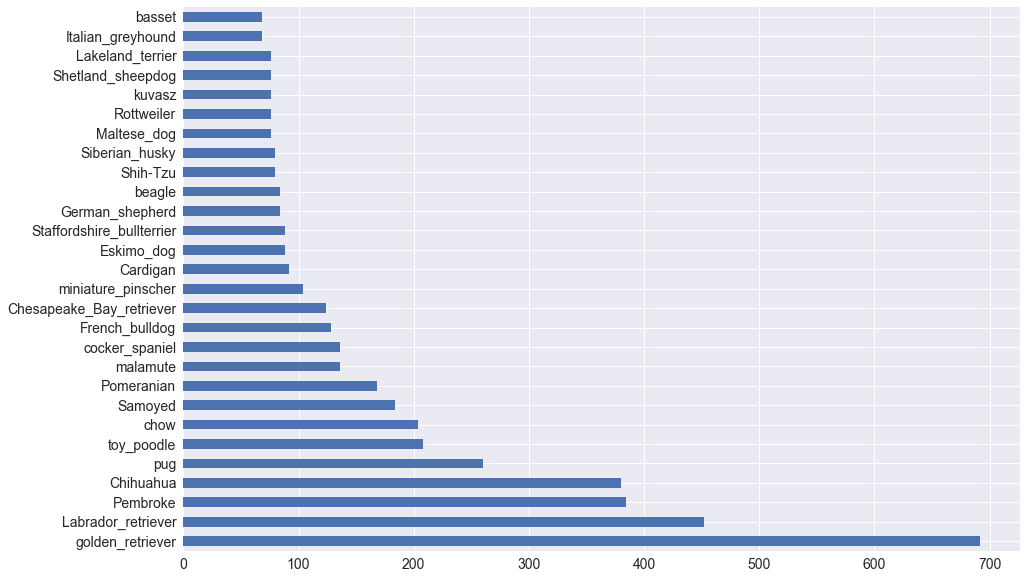

In [54]:
# Breed count . greater than count of 64
not_nan = df_master[df_master.dog_breed != 'NaN']
count = not_nan.dog_breed.value_counts()
sns.set_style('darkgrid')
count[count.values > 64].plot(kind ='barh');

## Conclusion

Using data from 3 different data source, including one which included API calls to twitter to get more details based on a tweet id, data wrangling was performed after gathering, assessing and cleaning up the data which forms quite significant part of this project. For data visualization , corrleation plot was explored and different types of charts plotted